In [1]:
# ライブラリにインポート
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
from sklearn import tree

In [2]:
# 学習データの読み込み
train_df=pd.read_csv("/Users/tasuke0630/making/DataScience/kaggle/house-prices/train.csv",index_col = 'Id')

# テストデータの読み込み
test_df=pd.read_csv("/Users/tasuke0630/making/DataScience/kaggle/house-prices/test.csv",index_col = 'Id')

<AxesSubplot:>

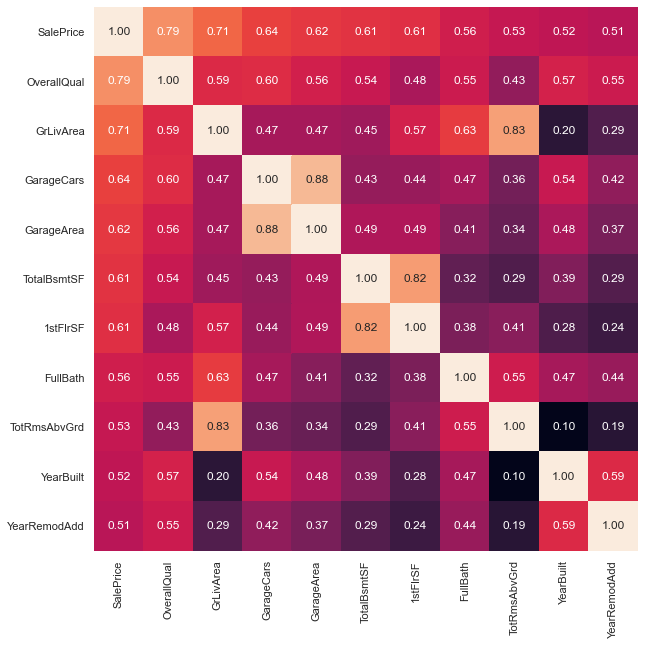

In [3]:
#corr()メソッドで相関関係が出る
correlation=train_df.corr()

#ターゲットとの相関性が高い上位n個の数値特徴のヒートマップ
n=11
plt.figure(figsize = (32,10))
sns.heatmap(train_df[correlation.nlargest(n, 'SalePrice').index].corr(), annot=True,fmt='.2f',square=True,cbar=False)

In [5]:
train_cleaning=train_df.drop('SalePrice', axis = 1).copy()
test_cleaning=test_df.copy()
train_test=pd.concat([train_cleaning, test_cleaning])

In [6]:
#ターゲットとの相関性が高い上位9個をピック
train_list=[]

x=train_cleaning.loc[1:1460,"OverallQual"]
train_list.append(x)
x=train_cleaning.loc[1:1460,"GrLivArea"]
train_list.append(x)
x=train_cleaning.loc[1:1460,"GarageCars"]
train_list.append(x)
x=train_cleaning.loc[1:1460,"GarageArea"]
train_list.append(x)
x=train_cleaning.loc[1:1460,"TotalBsmtSF"]
train_list.append(x)     
x=train_cleaning.loc[1:1460,"1stFlrSF"]
train_list.append(x)
x=train_cleaning.loc[1:1460,"FullBath"]
train_list.append(x)
x=train_cleaning.loc[1:1460,"YearBuilt"]
train_list.append(x)
x=train_cleaning.loc[1:1460,"YearRemodAdd"]
train_list.append(x)
x=train_df.loc[1:1460,"SalePrice"]
train_list.append(x)


train=pd.DataFrame(train_list)
train=train.T
train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,SalePrice
Id,,,,,,,,,,
1,7,1710,2,548,856,856,2,2003,2003,208500
2,6,1262,2,460,1262,1262,2,1976,1976,181500
3,7,1786,2,608,920,920,2,2001,2002,223500
4,7,1717,3,642,756,961,1,1915,1970,140000
5,8,2198,3,836,1145,1145,2,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...
1456,6,1647,2,460,953,953,2,1999,2000,175000
1457,6,2073,2,500,1542,2073,2,1978,1988,210000
1458,7,2340,1,252,1152,1188,2,1941,2006,266500


In [7]:
print(train.isnull().sum())

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64


In [8]:
# 正解をy_trainに格納する
y_train=train.SalePrice

# 特徴量をX_trainに格納する
X_train=train.drop(columns=["SalePrice"])

In [9]:
# 決定木モデルの準備(回帰)
model=tree.DecisionTreeRegressor()

# 決定木モデルの作成
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [15]:
#ターゲットとの相関性が高い上位9個をピック
test_list=[]

x=test_cleaning.loc[1461:2919,"OverallQual"]
test_list.append(x)
x=test_cleaning.loc[1461:2919,"GrLivArea"]
test_list.append(x)
x=test_cleaning.loc[1461:2919,"GarageCars"]
test_list.append(x)
x=test_cleaning.loc[1461:2919,"GarageArea"]
test_list.append(x)
x=test_cleaning.loc[1461:2919,"TotalBsmtSF"]
test_list.append(x)     
x=test_cleaning.loc[1461:2919,"1stFlrSF"]
test_list.append(x)
x=test_cleaning.loc[1461:2919,"FullBath"]
test_list.append(x)
x=test_cleaning.loc[1461:2919,"YearBuilt"]
test_list.append(x)
x=test_cleaning.loc[1461:2919,"YearRemodAdd"]
test_list.append(x)

test=pd.DataFrame(test_list)
test=test.T
test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd
Id,,,,,,,,,
1461,5.0,896.0,1.0,730.0,882.0,896.0,1.0,1961.0,1961.0
1462,6.0,1329.0,1.0,312.0,1329.0,1329.0,1.0,1958.0,1958.0
1463,5.0,1629.0,2.0,482.0,928.0,928.0,2.0,1997.0,1998.0
1464,6.0,1604.0,2.0,470.0,926.0,926.0,2.0,1998.0,1998.0
1465,8.0,1280.0,2.0,506.0,1280.0,1280.0,2.0,1992.0,1992.0
...,...,...,...,...,...,...,...,...,...
2915,4.0,1092.0,0.0,0.0,546.0,546.0,1.0,1970.0,1970.0
2916,4.0,1092.0,1.0,286.0,546.0,546.0,1.0,1970.0,1970.0
2917,5.0,1224.0,2.0,576.0,1224.0,1224.0,1.0,1960.0,1996.0


In [16]:
print(test.isnull().sum())

#GarageCars	,GarageArea,TotalBsmtSFの欠損値の補完

GarageCars_mode=test.GarageCars.mode()[0]
test.GarageCars=test.GarageCars.fillna(GarageCars_mode)

GarageArea_mode=test.GarageArea.mode()[0]
test.GarageArea=test.GarageArea.fillna(GarageArea_mode)

TotalBsmtSF_mode=test.TotalBsmtSF.mode()[0]
test.TotalBsmtSF=test.TotalBsmtSF.fillna(GarageCars_mode)

print()

print(test.isnull().sum())

OverallQual     0
GrLivArea       0
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
YearBuilt       0
YearRemodAdd    0
dtype: int64

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
YearBuilt       0
YearRemodAdd    0
dtype: int64


In [17]:
# 作成した決定木モデルを使った予測をおこなう
y_pred=model.predict(test)

In [18]:
# 予測結果の確認をする
y_pred

array([129900., 145000., 155000., ..., 154000., 112000., 284000.])

In [19]:
# 予測結果をテストデータに反映する
test["SalePrice"]=y_pred

# 提出用のデータマートを作成する
pred_df=test[["SalePrice"]]

# CSVの作成
pred_df.to_csv("predict4.csv",index_label=["Id"])